# ULMFiT on Arabic corpus

Original Dataset - [link](https://www.kaggle.com/abedkhooli/arabic-wiki-data-dump-2018).

The purpose is to build a language model for arabic which can be used later in different applications.

Some resources to consider:


*   A tutorial to build corpus from wikipedia - [link](https://www.kdnuggets.com/2017/11/building-wikipedia-text-corpus-nlp.html)
*   A tool to build a parallel corpus based on article titles across languages in Wikipedia - [link](https://github.com/clab/wikipedia-parallel-titles) 
*   A list of languages corpora extracted from wikipedia - [link](https://linguatools.org/tools/corpora/wikipedia-monolingual-corpora/)



In [1]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0    833      0 --:--:-- --:--:-- --:--:--   832
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.28)
Already up to date.


In [2]:
!pip install gensim

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *
from gensim.corpora import WikiCorpus

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
bs=48

## Data
### Downoald data 

In [0]:
!curl -O https://dumps.wikimedia.org/arwiki/20181101/arwiki-20181101-pages-articles-multistream.xml.bz2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  764M  100  764M    0     0  2004k      0  0:06:30  0:06:30 --:--:-- 2028k


In [0]:
path = Path('/gdrive/My Drive/data/arwiki')

### Create a corpus 

In [0]:
def next_fname(output_dir, num=0):
    """Get the next filename to use for writing new articles."""
    count = 0
    fname = output_dir + '/' + '{:>07d}'.format(num) + '.txt'
    return count, (num+1), fname

def make_corpus(input_file, output_dir, size=10000):
    """Convert Wikipedia xml dump file to text corpus"""

    wiki = WikiCorpus(input_file)
    count, num, fname = next_fname(output_dir)
    output = open(fname, 'w')

    # iterate over texts and store them
    for text in wiki.get_texts():
        output.write(bytes(' '.join(text), 'utf-8').decode('utf-8') + '\n')
        count += 1
        if (count == size):
            print('%s Done.' % fname)
            output.close()
            count, num, fname = next_fname(output_dir, num)
            output = open(fname, 'w')

    # clean up resources
    output.close()
    print('Completed.')

In [0]:
make_corpus('arwiki-20181101-pages-articles-multistream.xml.bz2', path.as_posix())

/gdrive/My Drive/data/arwiki/0000000.txt Done.
/gdrive/My Drive/data/arwiki/0000001.txt Done.
/gdrive/My Drive/data/arwiki/0000002.txt Done.
/gdrive/My Drive/data/arwiki/0000003.txt Done.
/gdrive/My Drive/data/arwiki/0000004.txt Done.
/gdrive/My Drive/data/arwiki/0000005.txt Done.
/gdrive/My Drive/data/arwiki/0000006.txt Done.
/gdrive/My Drive/data/arwiki/0000007.txt Done.
/gdrive/My Drive/data/arwiki/0000008.txt Done.
/gdrive/My Drive/data/arwiki/0000009.txt Done.
/gdrive/My Drive/data/arwiki/0000010.txt Done.
/gdrive/My Drive/data/arwiki/0000011.txt Done.
/gdrive/My Drive/data/arwiki/0000012.txt Done.
/gdrive/My Drive/data/arwiki/0000013.txt Done.
/gdrive/My Drive/data/arwiki/0000014.txt Done.
/gdrive/My Drive/data/arwiki/0000015.txt Done.
/gdrive/My Drive/data/arwiki/0000016.txt Done.
/gdrive/My Drive/data/arwiki/0000017.txt Done.
/gdrive/My Drive/data/arwiki/0000018.txt Done.
/gdrive/My Drive/data/arwiki/0000019.txt Done.
/gdrive/My Drive/data/arwiki/0000020.txt Done.
/gdrive/My Dr

## Language Model 
Will use a single text file for training, otherwise it would take ours to train on the entire dump.

In [0]:
!cp /gdrive/My\ Drive/data/arwiki/0000000.txt data/

In [0]:
PATH = Path('./data'); PATH.ls()

[PosixPath('data/0000000.txt')]

In [0]:
!head data/0000000.txt

ملف jpg يسار تصغير بك الماء هو المركب الكيميائي الأكثر شيوعا في الأرض ملف iceberg with hole near sandersons hope jpg يسار بك تصغير الماء في حالاته الثلاث السائلة والصلبة جليد والغازية بخار ماء سحاب الماء هو مادة شفافة عديمة اللون والرائحة يشكل المكون الأساسي من مسط حات الأرض المائية من جداول وبحيرات وبحار ومحيطات ويعد المكو الأساسي للسوائل في جميع الكائنات الحي وأكثر المرك بات الكيميائي انتشارا على سطح الأرض يتأل جزيء الماء من ذر أكسجين مركزية ترتبط بها ذر تي هيدروجين برابطة تساهمي لتكون صيغته عند الظروف القياسية من الضغط ودرجة الحرارة يكون الماء سائلا ولكن حالاته الأخرى شائعة الوجود أيضا وهي حالة الجليد الصلبة والبخار الغازي إن الماء هو أساس وجود الحياة على كوكب الأرض وهو يغط من سطحها وتمثل مياه البحار والمحيطات أكبر نسبة للماء على الأرض حيث تبلغ حوالي وتتوز النسب الباقية بين المياه الجوفي وبين جليد المناطق القطبي لكليهما مع وجود نسبة صغيرة على شكل بخار ماء معل في الهواء على هيئة سحاب غيوم وأحيانا أخرى على هيئة ضباب أو ندى بالإضافة إلى الزخات المطري أو الثلجي تبلغ نسبة الماء العذب حوا

In [0]:
!wc -l data/0000000.txt

10000 data/0000000.txt


In [0]:
df = pd.read_csv(Path(path)/'0000000.txt', header=None); df.head()

,0
0,ملف jpg يسار تصغير بك الماء هو المركب الكيميائ...
1,ملف euclid jpg تصغير الرياضياتي اليوناني إقليد...
2,إستونيا بالإستونية eesti رسميا جمهورية إستونيا...
3,السنجاب الرمادي السنجاب الطائر golden mantled ...
4,ملف braun hf jpg تصغير براون ألمانيا ملف samsu...


In [0]:
arbic = Tokenizer(lang='ar')

In [0]:
data_lm = TextLMDataBunch.from_csv(PATH, '0000000.txt', tokenizer=arbic, bs=48, header=None, text_cols=0, label_cols=None)
data_lm.save('tmp_lm')

In [0]:
data_lm = TextLMDataBunch.load(PATH, 'tmp_lm', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,xxbos xxfld 1 الع ان أكلة تصنع من أمعاء الخراف أو البقر أو الإبل xxunk xxunk وغيره وفي تونس والجزائر وليبيا تسمى هذه xxunk عصبان أما في غرب مصر تسمى xxunk ويعتبر الع ان xxunk الرسمية في تونس وليبيا والجزائر في أول وثاني وثالث أيام عيد الأضحى أنواع العصبان عصبان عادي عصبان xxunk عصبان xxunk والبطاطا عصبان xxunk عصبان xxunk الرأس عصبان xxunk يد عصبان xxunk عصبان xxunk عصبان شمس عصبان xxunk عصبان عادي ملف xxunk عصبان jpg تصغير بك طبق عصبان من ليبيا العصبان وجبة تقليدية ليبية تتكون من أمعاء الضأن xxunk xxunk واللحم
1,حيث عدد الكائنات الحية لكل وحدة مساحة في العالم المناطق التي تعرف الآن xxunk كانت مأهولة xxunk الأصليين ومنهم شعب xxunk xxunk xxunk وصل الإسبان عام وبدأوا حملة من الغزو والاستعمار أدت في النهاية إلى إنشاء غرناطة أو غرينادا الجديدة والتي تتبع التاج الإسباني بالإسبانية xxunk de xxunk granada وعاصمتها بوغوتا حصلت على الاستقلال من إسبانيا عام ولكن مع حلول عام كانت كولومبيا الكبرى قد انهارت xxunk فنزويلا والإكوادور ما يعرف الآن xxunk وبنما كو نت جمهورية غرناطة الجديدة أو xxunk عام xxunk الدولة الجديدة الفدرالية فأصبحت تعرف باتحاد xxunk الكونفدرالي وبعدها xxunk كولومبيا المتحدة
2,تتعلق xxunk العامة والخاصة علي السواء وقضايا الحرب ضد الاستعمار بجميع أشكاله وأيضا القضايا التي تخص العلاقة بين المواطن والسلطة ممثلة في أي من xxunk xxunk وهو ما يمكن أن xxunk في الكثير من أفلامه مثل xxunk xxunk عام والذي لم يعرض علي الجمهور بل تم عرضه في عروض خاصة وعلى أشرطة الفيديو علي الرغم من xxunk في مهرجان موسكو السينمائي الدولي عام xxunk برلين والقاهرة وفيلم ملف في الآداب الحب فوق هضبة الهرم البريء عام كتيبة الإعدام عام الهروب عام الذي يعتبر من xxunk الأفلام المصرية ناجي العلي عام الذي تم منعه من العرض
3,زراعي بحت إلى مجتمع صناعي وبعد عام المجلس المركزي وهو أعلى مجلس نابع من الحزب الشيوعي يغلب فيه xxunk عن غيرهم من النواب وأصبحت المجموعة الحاكمة معظمها من xxunk وساروا على هذا السبيل حتى يومنا هذا xxunk الحاكمة في الصين هم حاليا من أكثر السياسيين على مستوى العالم xxunk في العلوم الهندسية والاقتصادية والإدارة وتعليمهم كان بصفة رئيسية في العالم الغربي ولا يزالون يرسلون البعثات إلى أحسن كليات الاقتصاد والعلوم والهندسة في بريطانيا الولايات المتحدة الأمريكية لاكتساب المعرفة xxunk إلى الصين الشعبية xxunk أيضا xxunk xxunk xxunk مراجع تصنيف أشكال الحكومات تصنيف سياسة وتقنية تصنيف
4,مايكروسوفت xxunk بالتعاون مع آي بي إم xxunk xxunk جهاز xxunk بوكس ينافس xxunk بلاي ستيشن xxunk وي يعتبر جهاز xxunk بوكس جهاز ترفيهي متكامل حيث تعتبر شبكة xxunk بوكس لايف دور أساسي للجهاز والتي تسمح للاعبين xxunk على الشبكة اللعب الجماعي أيضا إمكانية تحميل المحتويات مثل ألعاب xxunk xxunk للألعاب وعروض للألعاب وبرامج التليفزيون والأفلام وغيرها من خلال الشبكة أعلن عنه أول مرة في مايو في قناة أم تي في وطرح في الأسواق الأمريكية xxunk xxunk في نوفمبر من نفس العام وفي الأسواق الأوروبية في الثاني من ديسمبر وفي اليابان في ديسمبر ثم بعد
5,لم يكن فيه ثم كان لأنه ليس بعالم حين ولادته ثم حصل فيه العلم بالتدريج وليس كذلك علم الله وبقاء المخلوق مثلا عبارة عن استمرار وجوده في الزمان الثاني أما بقاء الله xxunk عن xxunk عدمه وقدم المخلوق مثلا عبارة عن وجوده منذ أزمنة xxunk بالنسبة إلى غيرها وأما قدم الله فإنه عبارة عن عدم الأولية له وهكذا يقال في بقية الصفات في الأفعال وأما الأفعال ففعل الله عبارة عن خلق xxunk أي إيجاد xxunk من العدم إلى الوجود فالله خالق كل شيء وأما فعل المخلوق فلا يمكن أن يكون خلقا وإلا لم يكن الله
6,الجديدي سنة على نفس الفريق والكأس الثانية بعد فوزه في كل من سنة على الرشاد xxunk بضربات الترجيح بعد انتهاء المباراة بالتعادل سنة بعد فوزه على المغرب الفاسي وسنة بعد فوزه على الفتح الرباطي بضربات الترجيح بعد تعادل الفريقين وكان أول فريق حظي xxunk الشرف هو فريق الكوكب المراكشي سنة بعد فوزه على حسنية أكادير وسنة بعد فوزه على الوداد البيضاوي بنفس الحصة وسنة بعد فوزه على الرجاء البيضاوي أندية من الدرجة الثانية فازت بالكأس أول فريق ينتمي إلى الدرجة الثانية تمكن من الفوز بالكأس هو الجيش الملكي موسم أي سنة بعد تأسيسه وقبل صعوده
7,لأنه xxunk عن الشمس كما ينبغي أن يدور حول الشمس من اليمين إلى اليسار كحال بقية الكواكب xxunk دوران الكواكب حول الشمس ناتج عن دوران الشمس حول نفسها وبالتالي تسحب معها بقية الكواكب في نفس اتجاه دورانها بواسطة الجاذبية التي فيها فكيف صار بلوتو xxunk 

### Train
#### Training - phase 1
We can then put this in a learner object and trained. 

In [0]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


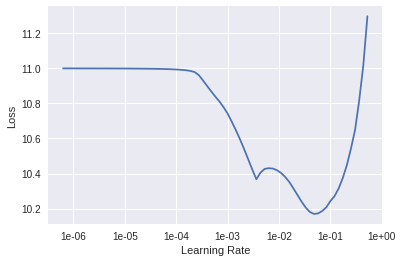

In [0]:
learn.recorder.plot(skip_end=12)

In [0]:
learn.fit_one_cycle(1, 5e-4, moms=(0.8, 0.7))

Total time: 31:33
epoch  train_loss  valid_loss  accuracy
1      7.476701    7.343642    0.131818  (31:33)



In [0]:
learn.save('arwiki-1')

#### Training - phase 2
continue from last time saved weights

In [0]:
PATH = Path('/gdrive/My Drive/arwiki')

In [0]:
data_lm = TextLMDataBunch.load(PATH, 'tmp_lm', bs=bs)

In [0]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [10]:
learn.load('arwiki-1')

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (7999 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /gdrive/My Drive/arwiki
x: LMTextList (7999 items)
[Text xxbos xxfld 1 ميجابايت mb كلمة تتكون من مقطعين ميجا وتعني مليون xxunk بايت xxunk هي وحدة قياس لسعة التخزين في الحاسوب سعة xxunk عمليا يساوي يساوي بايت كيلوبايت ثنائيا يساوي يساوي بايت كيلوبايت ميجابايت مليون بايت العلاقة بين xxunk xxunk تسمى كل ثمانية بتات مجتمعة بايت xxunk البت عبارة عن خانة واحدة من نظام عد ثنائي وله xxunk فقط أو xxunk فإما أن يكون البت أو يكون وعلى هذا الأساس يكون xxunk بت وهذه تعادل بايت وفي الاصطلاح الإنجليزي يفرق بين ميجابايت xxunk xxunk xxunk xxunk أو mb المراجع طالع كذلك بت بايت كيلوبايت xxunk xxunk xxunk xxunk xxunk xxunk تصنيف مصطلحات حوسبة تصنيف وحدات قياس للمعلومات, Text xxbos xxfld 1 xxunk ويرمز له بالرمز gb وتكتب أيضا xxunk كلمة تتكون من مقطعين جيجا وتعني مليار ألف مليون xxunk وحدة قياس سعة تخزين ذاكرة حاسوبية قيمة xxunk علميا جيجابايت ميجابايت كيلوبايت

In [11]:
learn.fit_one_cycle(4, 2e-3, moms=(0.8, 0.7))

Total time: 2:11:32
epoch  train_loss  valid_loss  accuracy
1      6.494748    6.450583    0.165572  (33:01)
2      5.982694    5.890470    0.187992  (32:54)
3      5.677928    5.628324    0.203663  (33:07)
4      5.383443    5.559011    0.208052  (32:29)



In [0]:
learn.save('arwiki-5')

#### Training - phase 2
Continue from here for furter training

In [13]:
learn.load('arwiki-5')

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (7999 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /gdrive/My Drive/arwiki
x: LMTextList (7999 items)
[Text xxbos xxfld 1 ميجابايت mb كلمة تتكون من مقطعين ميجا وتعني مليون xxunk بايت xxunk هي وحدة قياس لسعة التخزين في الحاسوب سعة xxunk عمليا يساوي يساوي بايت كيلوبايت ثنائيا يساوي يساوي بايت كيلوبايت ميجابايت مليون بايت العلاقة بين xxunk xxunk تسمى كل ثمانية بتات مجتمعة بايت xxunk البت عبارة عن خانة واحدة من نظام عد ثنائي وله xxunk فقط أو xxunk فإما أن يكون البت أو يكون وعلى هذا الأساس يكون xxunk بت وهذه تعادل بايت وفي الاصطلاح الإنجليزي يفرق بين ميجابايت xxunk xxunk xxunk xxunk أو mb المراجع طالع كذلك بت بايت كيلوبايت xxunk xxunk xxunk xxunk xxunk xxunk تصنيف مصطلحات حوسبة تصنيف وحدات قياس للمعلومات, Text xxbos xxfld 1 xxunk ويرمز له بالرمز gb وتكتب أيضا xxunk كلمة تتكون من مقطعين جيجا وتعني مليار ألف مليون xxunk وحدة قياس سعة تخزين ذاكرة حاسوبية قيمة xxunk علميا جيجابايت ميجابايت كيلوبايت

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


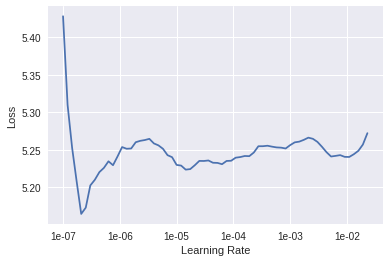

In [15]:
learn.recorder.plot(0,30)

In [16]:
learn.fit_one_cycle(1, 1e-7, moms=(0.8, 0.7))

Total time: 32:10
epoch  train_loss  valid_loss  accuracy
1      5.328636    5.558816    0.208042  (32:10)



In [0]:
learn.save('arwiki-6')

### Predict

In [0]:
learn.load('arwiki-6')

In [18]:
learn.predict('الماء', 5, temperature=1.1, min_p=0.001)

Total time: 00:00



'الماء الساخن الأسود مع مراعاة وجود'

In [22]:
learn.predict('حور العين', 10, temperature=1.1, min_p=0.01)

Total time: 00:00



'حور العين التي كان هناك بعض المصادر المصادر تصنيف أسماء الأنبياء من'

In [26]:
learn.predict('المصادر', 10, temperature=1.1, min_p=0.01)

Total time: 00:00



'المصادر موسوعة المورد أيضا في عام قبل أن يكون لها علاقة'

In [19]:
data_lm.vocab.itos[:10]

['xxunk', 'xxpad', 'في', 'من', 'على', 'إلى', 'تصنيف', 'أن', 'التي', 'عن']

In [32]:
len(data_lm.vocab.itos)

60002